# 3.3.5 Ejemplo: fusión de sensores

**Propósito:** $\;$ predicción de $\,\boldsymbol{z}\in\mathbb{R}^D\,$ con $\,M\,$ medidas independientes, cada una obtenida con un sensor de fiabilidad distinta
$$\boldsymbol{y}=(\boldsymbol{y}_1,\dotsc,\boldsymbol{y}_M),\,\boldsymbol{y}_m\in\mathbb{R}^D$$

**Prior:**
$$p(\boldsymbol{z})%
=\mathcal{N}(\boldsymbol{z}\mid\boldsymbol{\mu}_z,\mathbf{\Sigma}_z)%
\quad\text{con}\quad%
\boldsymbol{\mu}_z=\boldsymbol{0}_D%
\quad\text{y}\quad%
\mathbf{\Sigma}_z=10^{10}\mathbf{I}_D$$

**Verosimilitud:** $\;$ con $\,\boldsymbol{b}=\boldsymbol{0}$
$$p(\boldsymbol{y}\mid\boldsymbol{z})%
=\mathcal{N}(\boldsymbol{y}\mid\mathbf{W}\boldsymbol{z},\mathbf{\Sigma}_y)%
=\prod_{m=1}^M\mathcal{N}(\boldsymbol{y}_m\mid\boldsymbol{z},\mathbf{\Sigma}_m)%
\quad\text{con}\quad%
\mathbf{W}=[\mathbf{I}_D;\dotsc;\mathbf{I}_D]%
\quad\text{y}\quad%
\mathbf{\Sigma}_y=\operatorname{blkdiag}(\mathbf{\Sigma}_1,\dotsc,\mathbf{\Sigma}_M)$$

**Posterior:** $\;$ con $\,\boldsymbol{b}=\boldsymbol{0}$
$$\begin{align*}
p(\boldsymbol{z}\mid\boldsymbol{y})%
&=\mathcal{N}(\boldsymbol{z}\mid\boldsymbol{\mu}_{z|y},\mathbf{\Sigma}_{z|y})\\%
\mathbf{\Sigma}_{z|y}^{-1}%
&=\mathbf{\Sigma}_z^{-1}+\mathbf{W}^t\mathbf{\Sigma}_y^{-1}\mathbf{W}%
=\mathbf{\Sigma}_z^{-1}+\sum\nolimits_m\mathbf{\Sigma}_m^{-1}\\%
\boldsymbol{\mu}_{z|y}%
&=\mathbf{\Sigma}_{z|y}\,[\mathbf{W}^t\mathbf{\Sigma}_y^{-1}\boldsymbol{y}+\mathbf{\Sigma}_z^{-1}\boldsymbol{\mu}_z]%
=\mathbf{\Sigma}_{z|y}\,\left[\mathbf{\Sigma}_z^{-1}\boldsymbol{\mu}_z+\sum\nolimits_m\mathbf{\Sigma}_m^{-1}\boldsymbol{y}_m\right]
\end{align*}$$

**Ejemplo:** $\quad M=2,\quad\boldsymbol{y}_1=(0,-1)^t,\quad\boldsymbol{y}_2=(1,0)^t$
* Caso 1: $\;$ misma precisión, $\quad\mathbf{\Sigma}_1=\mathbf{\Sigma}_2=0.01\,\mathbf{I}_2$
* Caso 2: $\;$ mayor precisión del segundo, $\quad\mathbf{\Sigma}_1=0.05\,\mathbf{I}_2\quad\mathbf{\Sigma}_2=0.01\,\mathbf{I}_2$
* Caso 3: $\;$ mayor precisión del primero en $d=2$ y mayor precisión del segundo en $d=1$
$$\mathbf{\Sigma}_1=0.01\,[10, 1; 1, 1]\quad\mathbf{\Sigma}_2=0.01\,[1, 1; 1, 10]$$

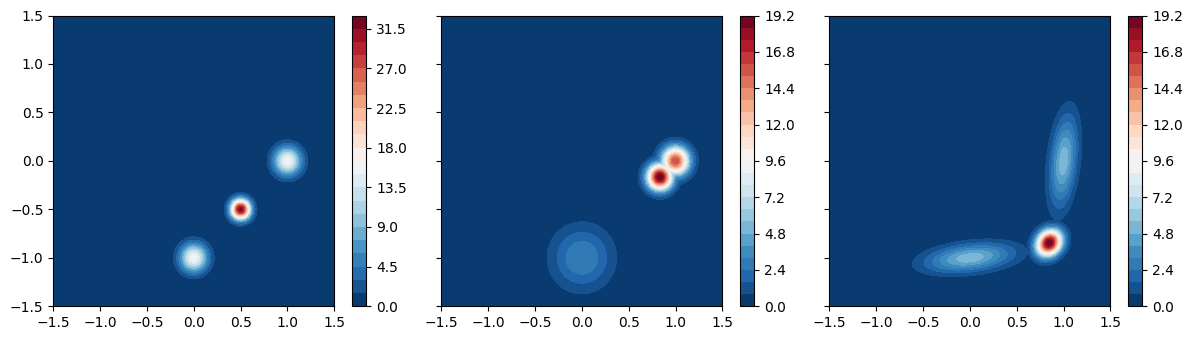

In [1]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import multivariate_normal as mvn
mz = np.array([0.0, 0.0]); Sz = 1e10 * np.eye(2); Szi = np.linalg.inv(Sz); C1S = 0.01 * np.eye(2)
y1 = np.array([0, -1]); y2 = np.array([1, 0]); C2S1 = 0.05 * np.eye(2); C2S2 = C1S
C3S1 = 0.01 * np.array([[10, 1], [1, 1]]); C3S2 = 0.01 * np.array([[1, 1], [1, 10]])
R = np.linspace(-1.5, 1.5, 200); x1, x2 = np.meshgrid(R, R)
fig, axs = plt.subplots(1, 3, figsize=(12, 3.5), sharey=True); fig.tight_layout()
for i, (S1, S2) in enumerate(zip((C1S, C2S1, C3S1), (C1S, C2S2, C3S2))):
    ax = axs.flat[i]; S1i = np.linalg.inv(S1); S2i = np.linalg.inv(S2); Szyi = Szi + S1i + S2i
    Szy = np.linalg.inv(Szyi); mzy = Szy @ (Szi @ mz + S1i @ y1 + S2i @ y2)
    p1 = mvn(y1, S1).pdf(np.dstack((x1, x2))); p2 = mvn(y2, S2).pdf(np.dstack((x1, x2)))
    pzy = mvn(mzy, Szy).pdf(np.dstack((x1, x2))); p = np.maximum.reduce([p1, p2, pzy])
    cp = ax.contourf(x1, x2, p, 30, cmap='RdBu_r'); plt.colorbar(cp, ax=ax)